In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

# MERGE ALL THE FILES

In [2]:

files =[file for file in os.listdir('Sales_Data')]

all_month_data=pd.DataFrame()   #create empty data frame 

for file in files:
    
    df=pd.read_csv('Sales_Data/'+file)            #read all csv file of sales_data
    
    all_month_data=pd.concat([all_month_data,df])   #concate df data frame with empty data frame
 
all_month_data.to_csv("sales.csv",index=False)      #it will convert dataframe to csv+--

In [3]:
sales=pd.read_csv("sales.csv")
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
sales.isna().sum()    # gives all column null values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
sales["Order Date"].isna().sum()    # give perticular column null values

545

# DROP ALL THE NULL VALUES

In [6]:
sales=sales.dropna().reset_index().drop('index',axis=1)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
sales=sales[sales["Order Date"].str[0:2] != "Or"]   # remove the Duplicate Hadding of Order Date column of "Or"

In [9]:
sales["Month"]=sales["Order Date"].str[0:2]
sales['Month']=sales["Month"].astype("int32")    # make the Month column data type str to int 

In [10]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
type(sales["Month"][0])

numpy.int32

In [12]:
type(sales['Quantity Ordered'][3])

str

In [13]:
type(sales['Price Each'][3])

str

In [14]:
sales["Quantity Ordered"]=sales["Quantity Ordered"].astype("int32")
# sales['Month']=sales["Month"].astype("int32")  

In [15]:
type(sales['Quantity Ordered'][3])

numpy.int32

In [16]:
sales["Price Each"]=sales["Price Each"].astype("float")


# ADD NEW COLUMN SALE

In [17]:
sales["sale"]=sales['Quantity Ordered']*sales["Price Each"]

In [18]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
sales=sales.rename(columns = {"sale":"Sale"})
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Q1: BEST MONTH FOR SALE

In [20]:
c1=sales.groupby("Month").sum().reset_index()
c1

,Month,Quantity Ordered,Price Each,Sale
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


In [21]:
from  matplotlib import pyplot as plt

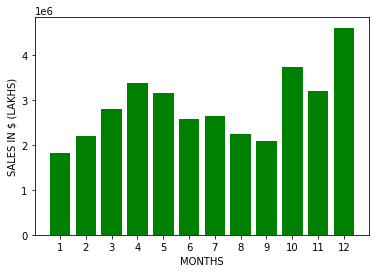

In [22]:
plt.bar(c1["Month"],c1["Sale"],color="g")
plt.xticks(c1["Month"])
plt.xlabel("MONTHS")
plt.ylabel("SALES IN $ (LAKHS)")
plt.show()

In [23]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Q2 : BEST CITY FOR SALE

In [24]:
city=sales["Purchase Address"].value_counts().reset_index()[0:6].rename(columns = {'index':'city',"Purchase Address":"n_o_time"})
city

,city,n_o_time
0,"193 Forest St, San Francisco, CA 94016",9
1,"279 Sunset St, San Francisco, CA 94016",8
2,"223 Elm St, Los Angeles, CA 90001",8
3,"197 Center St, San Francisco, CA 94016",7
4,"727 9th St, San Francisco, CA 94016",7
5,"662 Chestnut St, San Francisco, CA 94016",7


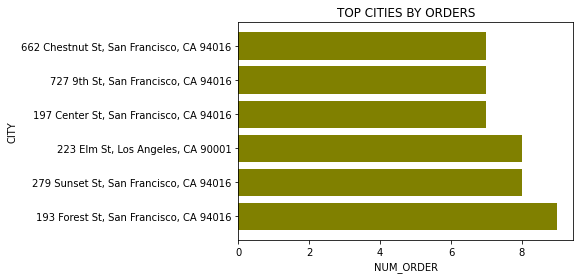

In [25]:
plt.barh(city["city"],city["n_o_time"],color="olive")
plt.xlabel("NUM_ORDER")
plt.ylabel("CITY")
plt.title("TOP CITIES BY ORDERS")
plt.show()

In [26]:
city_sale=sales[["Purchase Address",'Sale']].groupby("Purchase Address").sum().reset_index()
city_sale

,Purchase Address,Sale
0,"1 11th St, Atlanta, GA 30301",11.95
1,"1 11th St, Los Angeles, CA 90001",1700.00
2,"1 11th St, San Francisco, CA 94016",700.00
3,"1 12th St, Los Angeles, CA 90001",150.00
4,"1 12th St, New York City, NY 10001",11.99
...,...,...
140782,"999 Wilson St, Atlanta, GA 30301",99.99
140783,"999 Wilson St, Los Angeles, CA 90001",999.99
140784,"999 Wilson St, New York City, NY 10001",150.00
140785,"999 Wilson St, Portland, OR 97035",2.99


In [27]:
top_city=city_sale.sort_values("Sale",ascending=False).reset_index().drop("index",axis=1)[0:9]
top_city

,Purchase Address,Sale
0,"668 Park St, San Francisco, CA 94016",4379.99
1,"795 1st St, Atlanta, GA 30301",4100.00
2,"391 1st St, Seattle, WA 98101",4100.00
3,"10 1st St, San Francisco, CA 94016",4000.00
4,"731 11th St, New York City, NY 10001",3919.88
5,"208 Chestnut St, San Francisco, CA 94016",3789.99
6,"949 Hickory St, New York City, NY 10001",3779.99
7,"611 Wilson St, San Francisco, CA 94016",3718.78
8,"610 14th St, Los Angeles, CA 90001",3699.98


Text(0.5, 1.0, 'TOP 5 CITY BY SALES')

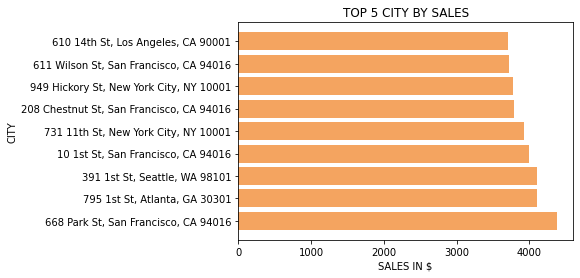

In [28]:
plt.barh(top_city["Purchase Address"],top_city["Sale"],color='sandybrown')
plt.xlabel("SALES IN $")
plt.ylabel("CITY")
plt.title("TOP 5 CITY BY SALES")

# Q3 : AT WHAT TIME MOST ORDER COME

In [29]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [30]:
sales["Order Date"]=pd.to_datetime(sales["Order Date"])
sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
type(sales["Order Date"][9])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
sales["Time"]=pd.DatetimeIndex(sales["Order Date"]).hour
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [33]:
time=sales[['Sale',"Time"]].groupby("Time").count().sort_values("Sale",ascending=False).reset_index()
time.head()   # give the top time for saling product

,Time,Sale
0,19,12905
1,12,12587
2,11,12411
3,18,12280
4,20,12228


In [34]:
time=sales[['Sale',"Time"]].groupby("Time").count().reset_index()
time.head()    # give the sale of product by time

,Time,Sale
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854


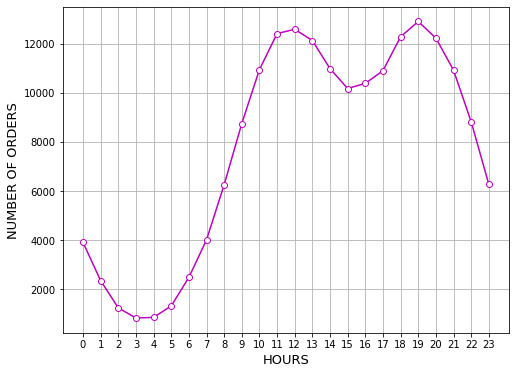

In [35]:
plt.figure(figsize=(8,6))
plt.plot(time["Time"],time["Sale"],color="m",marker="o",markerfacecolor='w')
plt.xticks(time["Time"])
plt.grid()
plt.xlabel("HOURS",size=13)
plt.ylabel("NUMBER OF ORDERS",size=13)
plt.show()

In [36]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [37]:
x=sales.groupby("Time")
x

In [38]:
x.get_group(19)    # through this we can get product sale of perticular time example as at 19 o clock

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Time
12,176569,27in 4K Gaming Monitor,1,389.99,2019-04-16 19:23:00,"657 Hill St, Dallas, TX 75001",4,389.99,19
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,19
21,176577,Apple Airpods Headphones,1,150.00,2019-04-04 19:25:00,"260 Spruce St, Dallas, TX 75001",4,150.00,19
33,176587,27in FHD Monitor,1,149.99,2019-04-29 19:38:00,"557 5th St, Los Angeles, CA 90001",4,149.99,19
...,...,...,...,...,...,...,...,...,...
186257,259312,Wired Headphones,1,11.99,2019-09-02 19:51:00,"573 Sunset St, San Francisco, CA 94016",9,11.99,19
186275,259329,Lightning Charging Cable,1,14.95,2019-09-05 19:00:00,"480 Lincoln St, Atlanta, GA 30301",9,14.95,19
186278,259332,Apple Airpods Headphones,1,150.00,2019-09-16 19:21:00,"782 Lake St, Atlanta, GA 30301",9,150.00,19
186289,259343,USB-C Charging Cable,1,11.95,2019-09-14 19:30:00,"675 Maple St, Austin, TX 73301",9,11.95,19


# Q4 :TOP PRODUCT WHICH OFTEN MORE SOLD

In [39]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [40]:

prod=  sales.groupby("Product")        # give the most soled product (how much)

prod= prod[["Product","Quantity Ordered"]].sum().reset_index()

prod

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


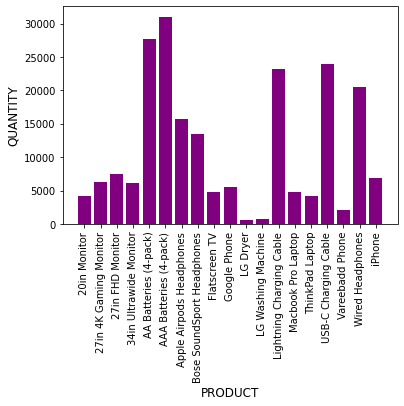

In [50]:
plt.bar(prod["Product"],prod["Quantity Ordered"],color="purple")
plt.xticks(rotation=90)
plt.xlabel("PRODUCT",size=12)
plt.ylabel("QUANTITY",size=12)
plt.show()

In [51]:
price=sales.groupby("Product").mean()["Price Each"].reset_index()
price.head()

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84


C:\Users\star\AppData\Local\Temp\ipykernel_5984\517396914.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(price["Product"],rotation=90,size=8)


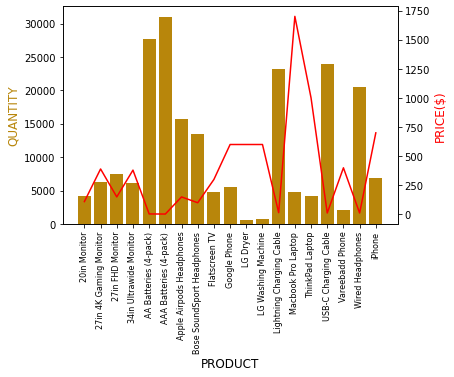

In [43]:
fig , ax1=plt.subplots()                  # for multiple y axis
    
ax2=ax1.twinx()                   

ax1.bar(prod["Product"],prod["Quantity Ordered"],color="darkgoldenrod")
ax2.plot(price["Product"],price["Price Each"],color="r")


ax1.set_xlabel("PRODUCT",size=12)
ax1.set_ylabel("QUANTITY",size=12,color="darkgoldenrod")

ax2.set_ylabel("PRICE($)",color="r",size=12)

ax1.set_xticklabels(price["Product"],rotation=90,size=8)



plt.show()

# Q5: what products are more often sold together

In [44]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [45]:
df=sales[sales["Order ID"].duplicated(keep=False)]

df["Grouped_Prod"]=df.groupby("Order ID")["Product"].transform(lambda x: " , ".join(x))

df=df[["Order ID","Grouped_Prod"]].drop_duplicates()

df.head(10)


C:\Users\star\AppData\Local\Temp\ipykernel_5984\2866554934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped_Prod"]=df.groupby("Order ID")["Product"].transform(lambda x: " , ".join(x))


,Order ID,Grouped_Prod
2,176560,"Google Phone , Wired Headphones"
17,176574,"Google Phone , USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones , Bose SoundSport H..."
31,176586,"AAA Batteries (4-pack) , Google Phone"
118,176672,"Lightning Charging Cable , USB-C Charging Cable"
128,176681,"Apple Airpods Headphones , ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones , AAA Batteries (4-..."
188,176739,"34in Ultrawide Monitor , Google Phone"
224,176774,"Lightning Charging Cable , USB-C Charging Cable"
232,176781,"iPhone , Lightning Charging Cable"


In [46]:
df=df["Grouped_Prod"].value_counts().reset_index().rename(columns={"index": "Group_of_product",'Grouped_Prod': "no_of_time"})
df.head(10)

,Group_of_product,no_of_time
0,"iPhone , Lightning Charging Cable",882
1,"Google Phone , USB-C Charging Cable",856
2,"iPhone , Wired Headphones",361
3,"Vareebadd Phone , USB-C Charging Cable",312
4,"Google Phone , Wired Headphones",303
5,"iPhone , Apple Airpods Headphones",286
6,"Google Phone , Bose SoundSport Headphones",161
7,"Vareebadd Phone , Wired Headphones",104
8,"Google Phone , USB-C Charging Cable , Wired He...",77
9,"Vareebadd Phone , Bose SoundSport Headphones",60


In [47]:
df=df[0:10]
df

,Group_of_product,no_of_time
0,"iPhone , Lightning Charging Cable",882
1,"Google Phone , USB-C Charging Cable",856
2,"iPhone , Wired Headphones",361
3,"Vareebadd Phone , USB-C Charging Cable",312
4,"Google Phone , Wired Headphones",303
5,"iPhone , Apple Airpods Headphones",286
6,"Google Phone , Bose SoundSport Headphones",161
7,"Vareebadd Phone , Wired Headphones",104
8,"Google Phone , USB-C Charging Cable , Wired He...",77
9,"Vareebadd Phone , Bose SoundSport Headphones",60


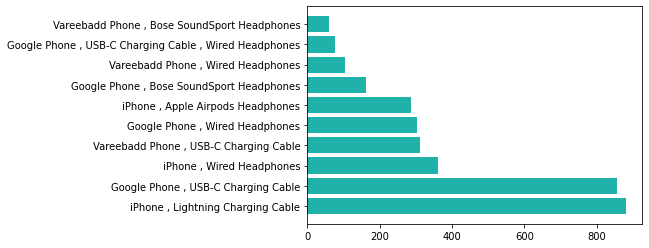

In [48]:
plt.barh(df["Group_of_product"],df["no_of_time"],color='lightseagreen')
plt.show()

# REPORT OF THE ANALYSIS

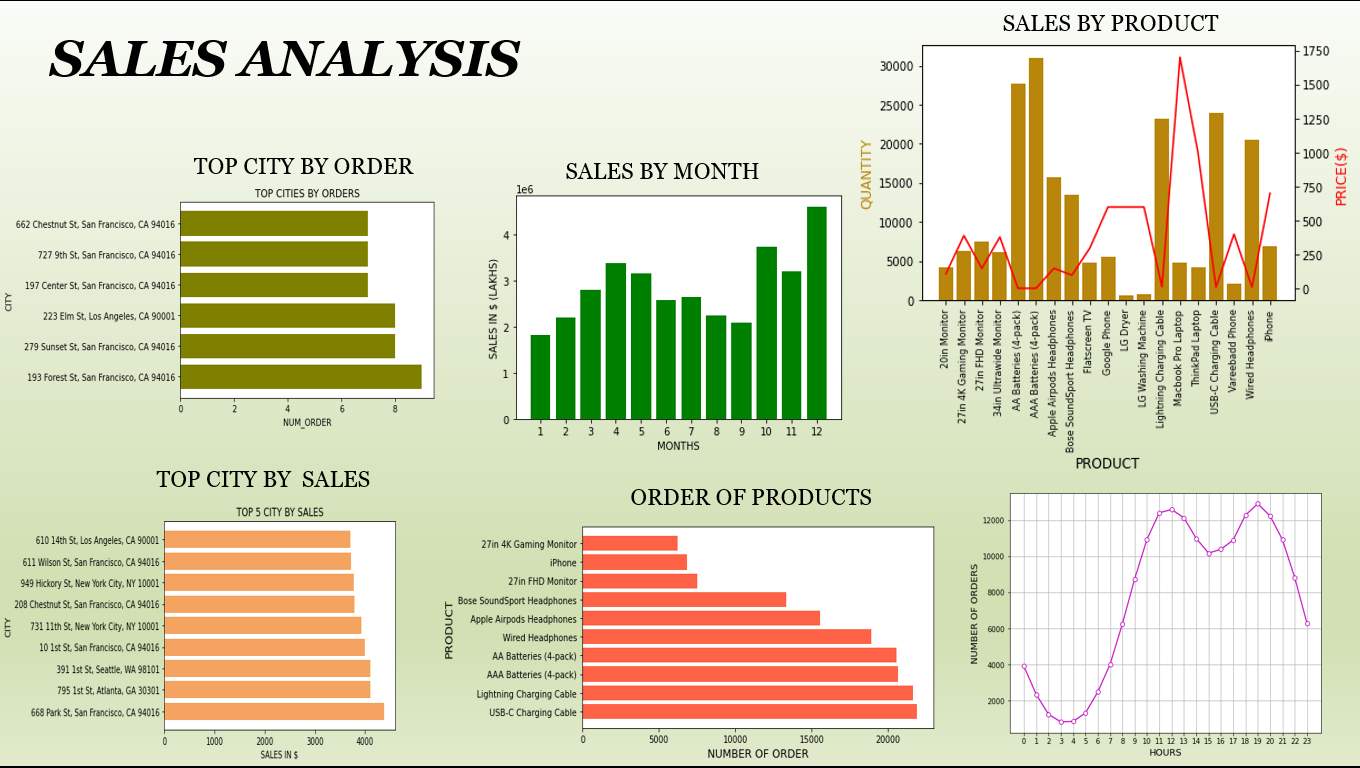